In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
bank_full = pd.read_csv("E:\\Freelance-Projects\\project-3\\bank-full.csv",  sep = ";")

In [3]:
bank_full.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
bank_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
bank_full.drop('balance',inplace = True,axis = 1)

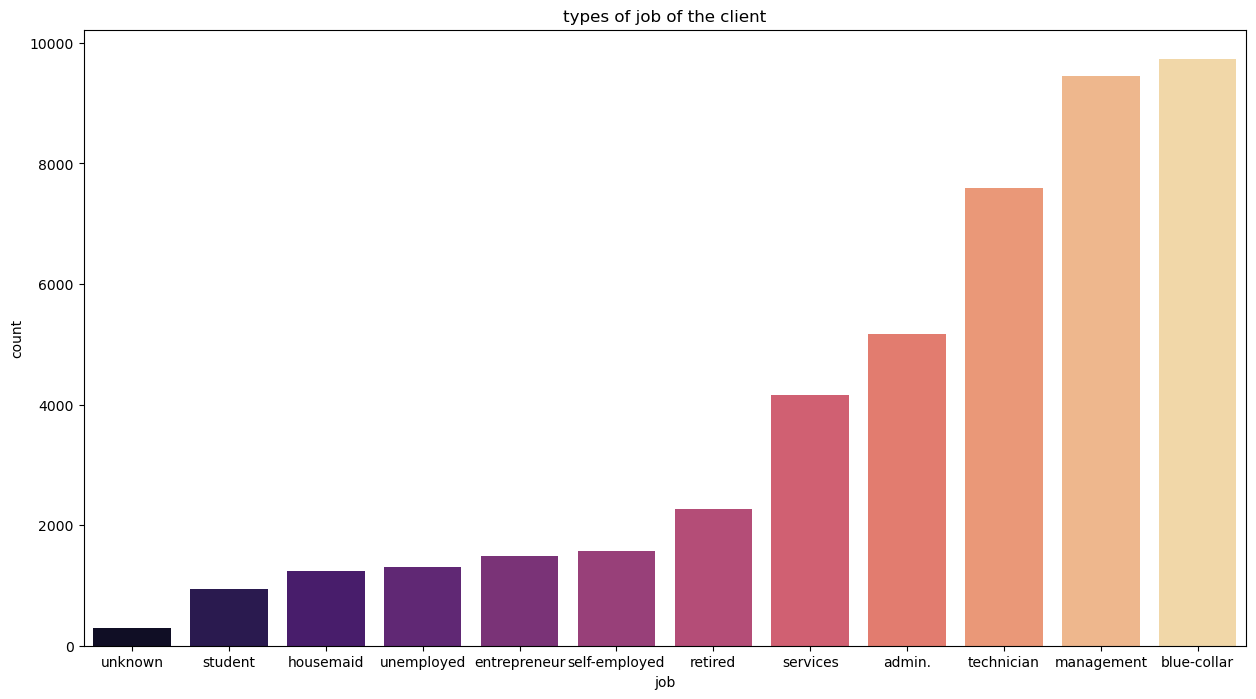

In [6]:
plt.figure(figsize = (15,8))
sns.countplot(x = 'job', palette = 'magma', data = bank_full, order = bank_full['job'].value_counts(ascending = True).index)
plt.title('types of job of the client')
plt.show()

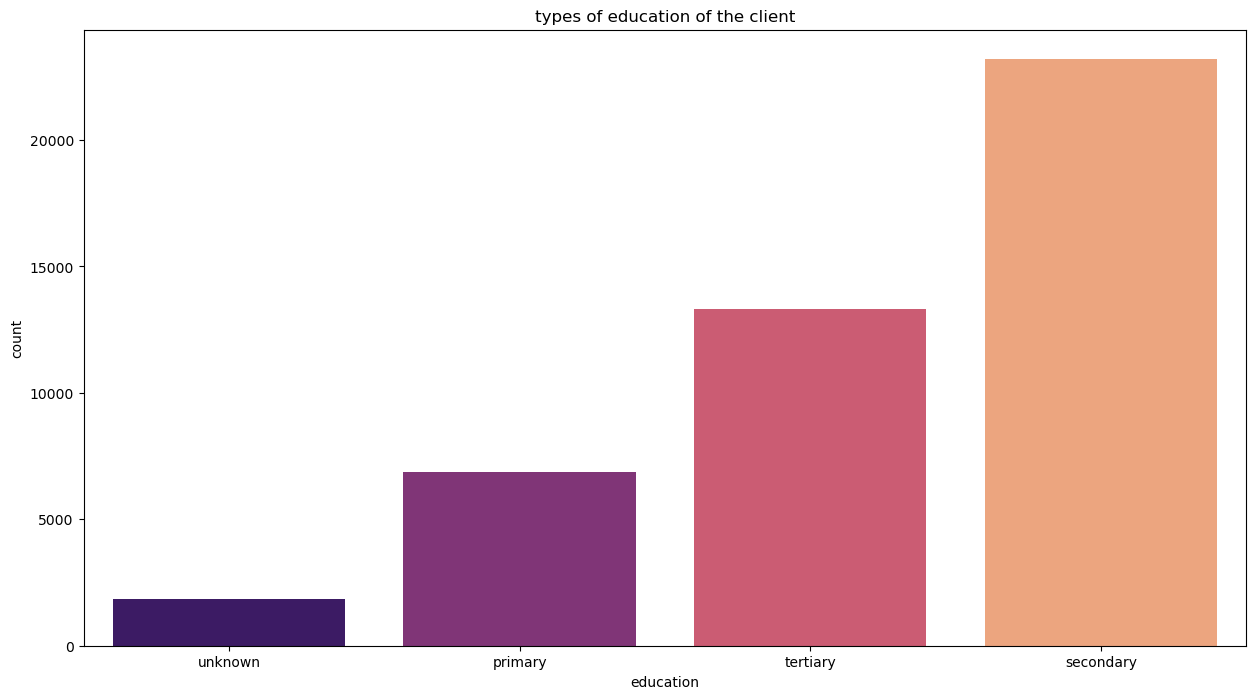

In [7]:
plt.figure(figsize = (15,8))
sns.countplot(x = 'education', palette = 'magma', data = bank_full, order = bank_full['education'].value_counts(ascending = True).index)
plt.title('types of education of the client')
plt.show()

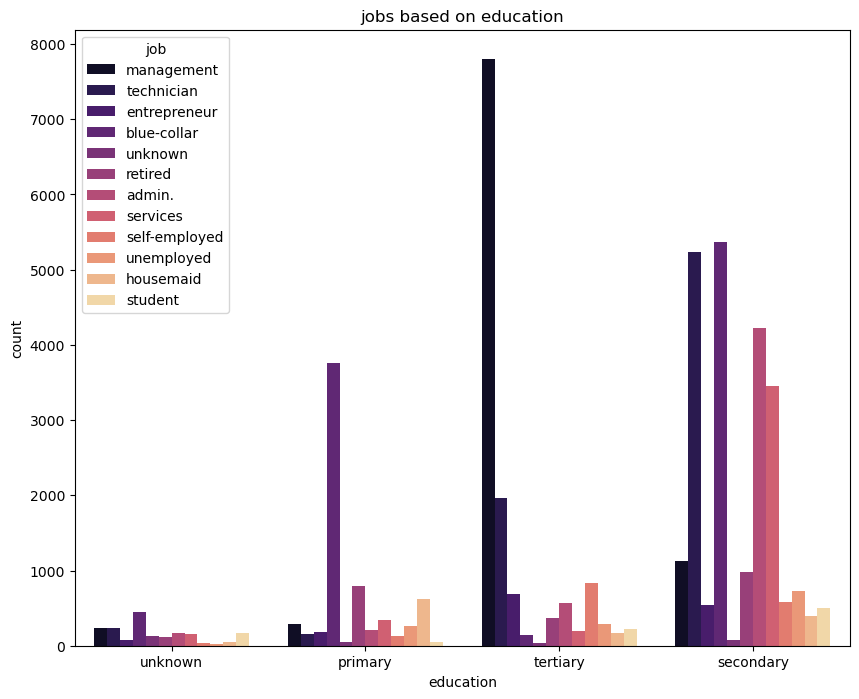

In [8]:
plt.figure(figsize = (10,8))
sns.countplot(x = 'education',hue = 'job', palette = 'magma', data = bank_full, order = bank_full['education'].value_counts(ascending = True).index)
plt.title('jobs based on education')
plt.show()

In [9]:
bank_full['duration/min'] = bank_full['duration'] / 60

In [10]:
bank_full['duration/min'] = bank_full['duration/min'].round(2)

In [11]:
bank_full.head(10)

,age,job,marital,education,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,duration/min
0,58,management,married,tertiary,no,yes,no,unknown,5,may,261,1,-1,0,unknown,no,4.35
1,44,technician,single,secondary,no,yes,no,unknown,5,may,151,1,-1,0,unknown,no,2.52
2,33,entrepreneur,married,secondary,no,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,1.27
3,47,blue-collar,married,unknown,no,yes,no,unknown,5,may,92,1,-1,0,unknown,no,1.53
4,33,unknown,single,unknown,no,no,no,unknown,5,may,198,1,-1,0,unknown,no,3.30
5,35,management,married,tertiary,no,yes,no,unknown,5,may,139,1,-1,0,unknown,no,2.32
6,28,management,single,tertiary,no,yes,yes,unknown,5,may,217,1,-1,0,unknown,no,3.62
7,42,entrepreneur,divorced,tertiary,yes,yes,no,unknown,5,may,380,1,-1,0,unknown,no,6.33
8,58,retired,married,primary,no,yes,no,unknown,5,may,50,1,-1,0,unknown,no,0.83
9,43,technician,single,secondary,no,yes,no,unknown,5,may,55,1,-1,0,unknown,no,0.92


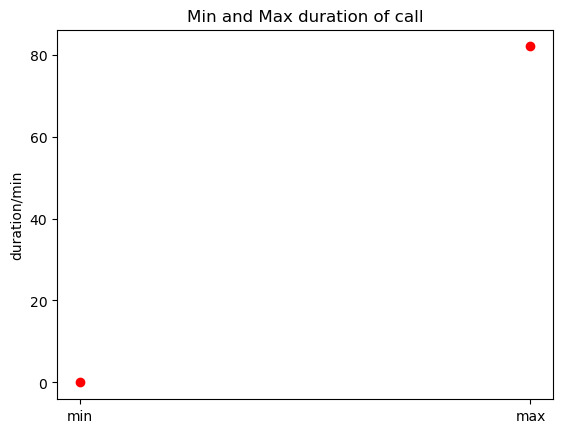

In [12]:
plt.plot(['min', 'max'], [bank_full['duration/min'].min(), bank_full['duration/min'].max()], 'ro')
plt.ylabel('duration/min')
plt.title('Min and Max duration of call')
plt.show()

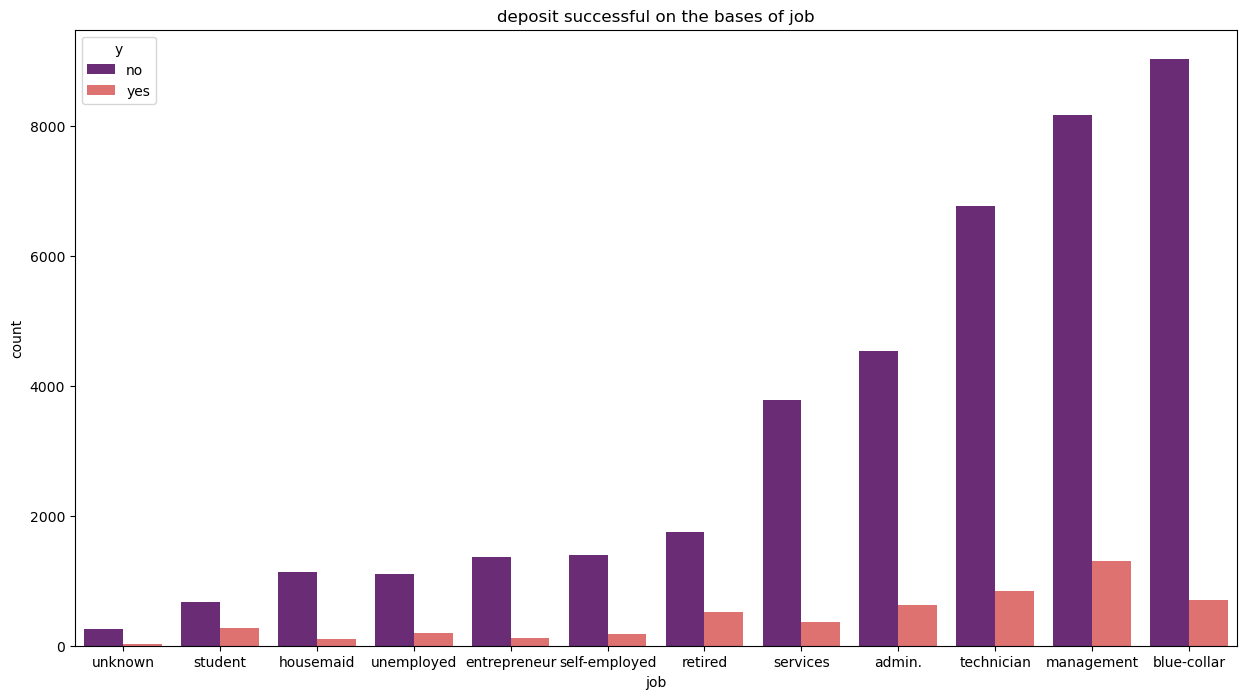

In [13]:
plt.figure(figsize = (15,8))
sns.countplot(x = 'job', hue = 'y',data = bank_full, palette = 'magma', order = bank_full['job'].value_counts(ascending = True).index)
plt.title('deposit successful on the bases of job')
plt.show()

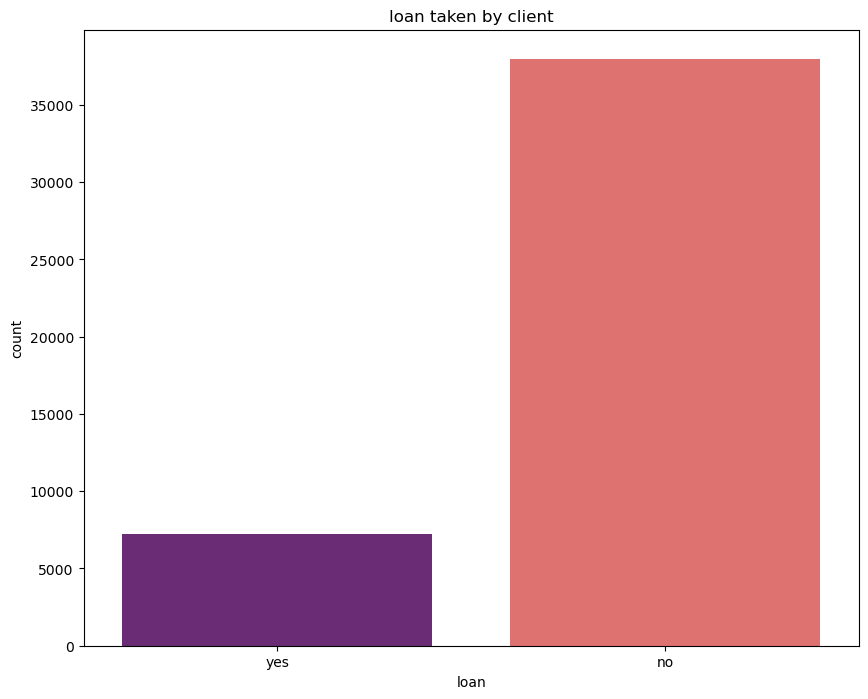

In [14]:
plt.figure(figsize = (10,8))
sns.countplot(x = 'loan', palette = 'magma', data = bank_full, order = bank_full['loan'].value_counts(ascending = True).index)
plt.title('loan taken by client')
plt.show()

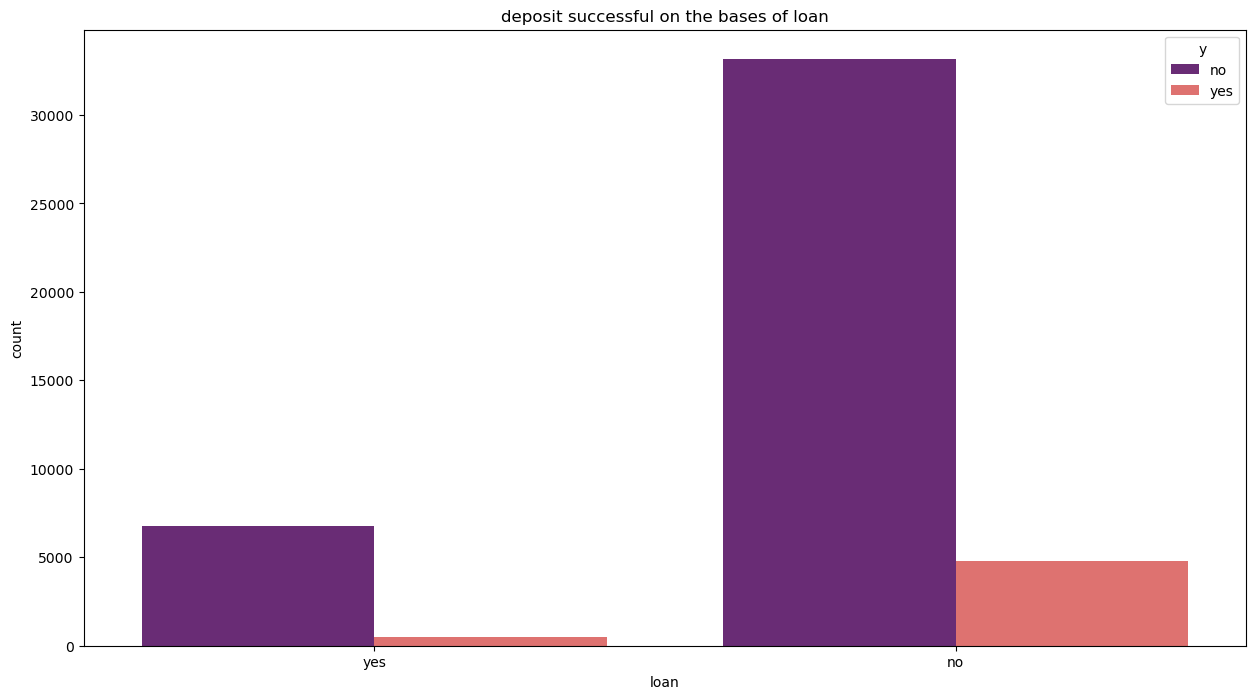

In [15]:
plt.figure(figsize = (15,8))
sns.countplot(x = 'loan', hue = 'y',data = bank_full, palette = 'magma', order = bank_full['loan'].value_counts(ascending = True).index)
plt.title('deposit successful on the bases of loan')
plt.show()

In [16]:
bank_full.value_counts('campaign')

campaign
1     17544
2     12505
3      5521
4      3522
5      1764
6      1291
7       735
8       540
9       327
10      266
11      201
12      155
13      133
14       93
15       84
16       79
17       69
18       51
19       44
20       43
21       35
22       23
25       22
23       22
24       20
28       16
29       16
26       13
31       12
27       10
32        9
30        8
33        6
34        5
36        4
35        4
38        3
43        3
37        2
41        2
50        2
39        1
44        1
46        1
51        1
55        1
58        1
63        1
dtype: int64

In [17]:
# sns.countplot(x = 'campaign',palette = 'magma')
# plt.title('title asked by qaari')
# plt.show()

In [18]:
bank_full.groupby('job')['campaign'].sum()

job
admin.           13317
blue-collar      27415
entrepreneur      4163
housemaid         3498
management       27091
retired           5313
self-employed     4505
services         11292
student           2157
technician       22083
unemployed        3169
unknown            953
Name: campaign, dtype: int64

In [21]:
bank_full.groupby('job')[['campaign','y']].sum()

,campaign
job,
admin.,13317
blue-collar,27415
entrepreneur,4163
housemaid,3498
management,27091
retired,5313
self-employed,4505
services,11292
student,2157


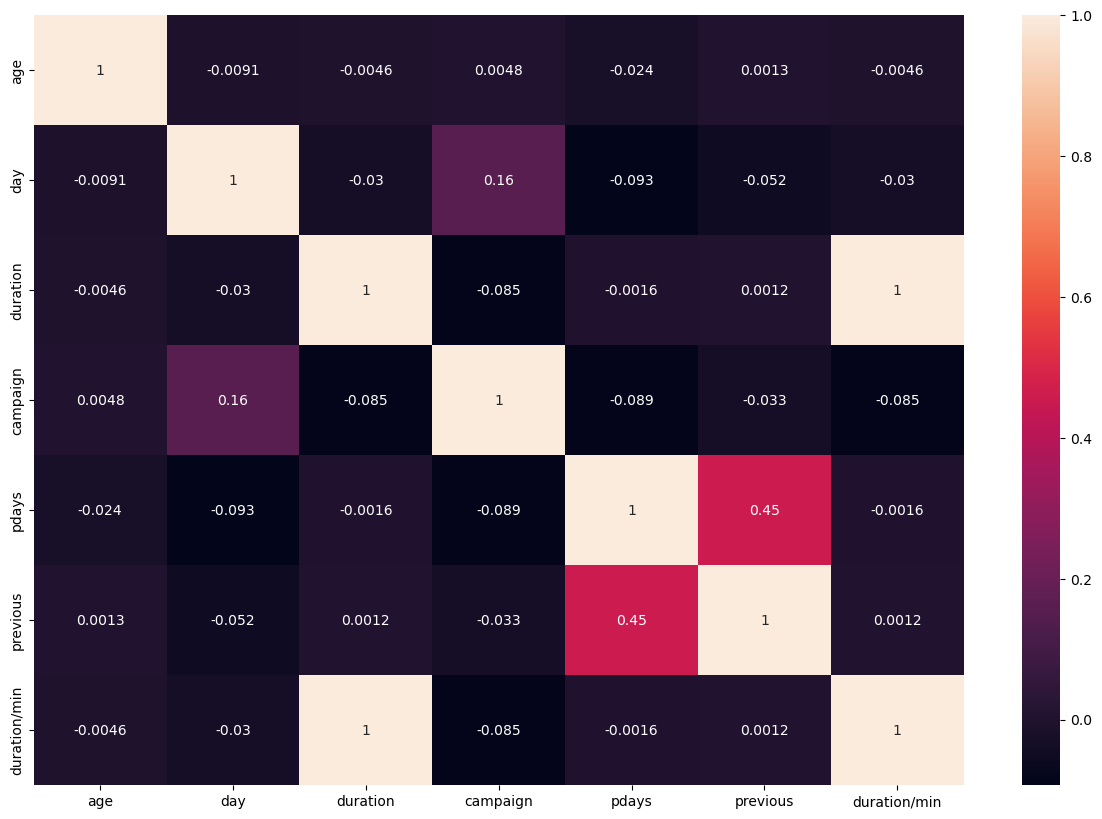

In [19]:
plt.figure(figsize= (15,10))
sns.heatmap(bank_full.corr(),annot = True)
plt.show()

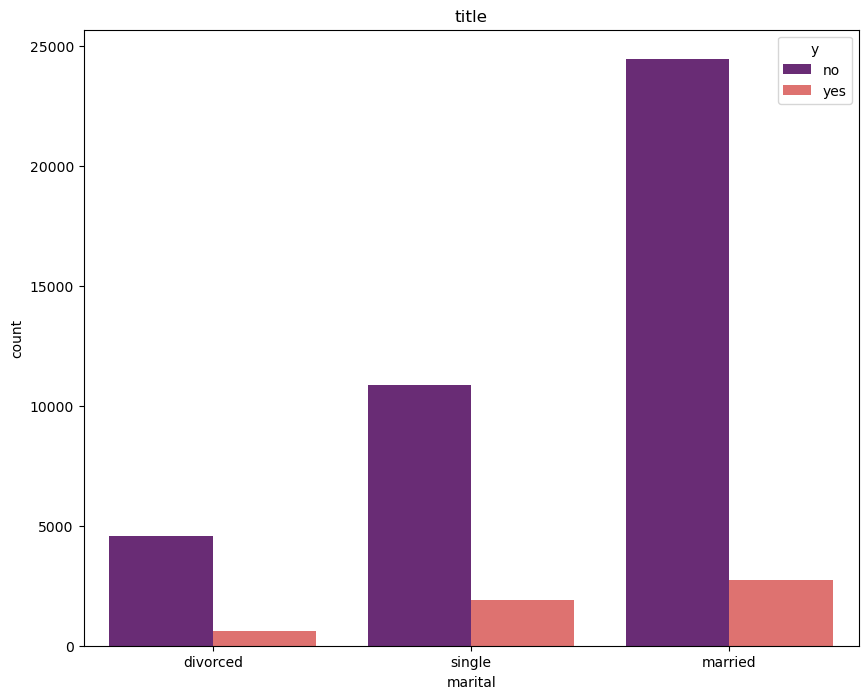

In [18]:
plt.figure(figsize = (10,8))
sns.countplot(x = 'marital',hue = 'y', palette = 'magma', data = bank_full, order = bank_full['marital'].value_counts(ascending = True).index)
plt.title('title')
plt.show()

In [19]:
bank_full.value_counts('poutcome')

poutcome
unknown    36959
failure     4901
other       1840
success     1511
dtype: int64

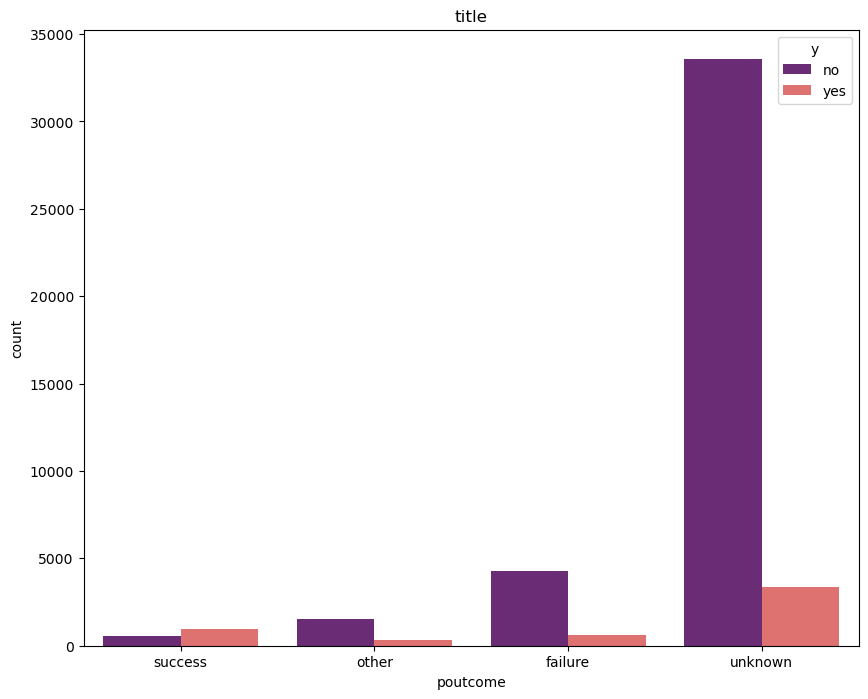

In [20]:
plt.figure(figsize = (10,8))
sns.countplot(x = 'poutcome',hue = 'y', palette = 'magma', data = bank_full, order = bank_full['poutcome'].value_counts(ascending = True).index)
plt.title('title')
plt.show()

In [29]:
bank_full_copy = bank_full.copy()

In [30]:
bank_full_copy.head()

,age,job,marital,education,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,duration/min
0,58,management,married,tertiary,no,yes,no,unknown,5,may,261,1,-1,0,unknown,no,4.35
1,44,technician,single,secondary,no,yes,no,unknown,5,may,151,1,-1,0,unknown,no,2.52
2,33,entrepreneur,married,secondary,no,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,1.27
3,47,blue-collar,married,unknown,no,yes,no,unknown,5,may,92,1,-1,0,unknown,no,1.53
4,33,unknown,single,unknown,no,no,no,unknown,5,may,198,1,-1,0,unknown,no,3.30


In [31]:
bank_full_copy['job'] = bank_full_copy['job'].astype('category')
bank_full_copy['marital'] = bank_full_copy['marital'].astype('category')
bank_full_copy['y'] = bank_full_copy['y'].astype('category')

In [32]:
bank_full_copy.head()

,age,job,marital,education,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,duration/min
0,58,management,married,tertiary,no,yes,no,unknown,5,may,261,1,-1,0,unknown,no,4.35
1,44,technician,single,secondary,no,yes,no,unknown,5,may,151,1,-1,0,unknown,no,2.52
2,33,entrepreneur,married,secondary,no,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,1.27
3,47,blue-collar,married,unknown,no,yes,no,unknown,5,may,92,1,-1,0,unknown,no,1.53
4,33,unknown,single,unknown,no,no,no,unknown,5,may,198,1,-1,0,unknown,no,3.30


In [34]:
bank_full_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   age           45211 non-null  int64   
 1   job           45211 non-null  category
 2   marital       45211 non-null  category
 3   education     45211 non-null  object  
 4   default       45211 non-null  object  
 5   housing       45211 non-null  object  
 6   loan          45211 non-null  object  
 7   contact       45211 non-null  object  
 8   day           45211 non-null  int64   
 9   month         45211 non-null  object  
 10  duration      45211 non-null  int64   
 11  campaign      45211 non-null  int64   
 12  pdays         45211 non-null  int64   
 13  previous      45211 non-null  int64   
 14  poutcome      45211 non-null  object  
 15  y             45211 non-null  category
 16  duration/min  45211 non-null  float64 
dtypes: category(3), float64(1), int64(6), object(7)
me

In [36]:
plt.figure(figsize = (10,8))
sns.barplot(x = 'job',y = 'marital',hue = 'y', palette = 'magma', data = bank_full_copy)
plt.title('title')
plt.show()

TypeError: Neither the `x` nor `y` variable appears to be numeric.

<Figure size 1000x800 with 0 Axes>

<Figure size 2000x800 with 0 Axes>

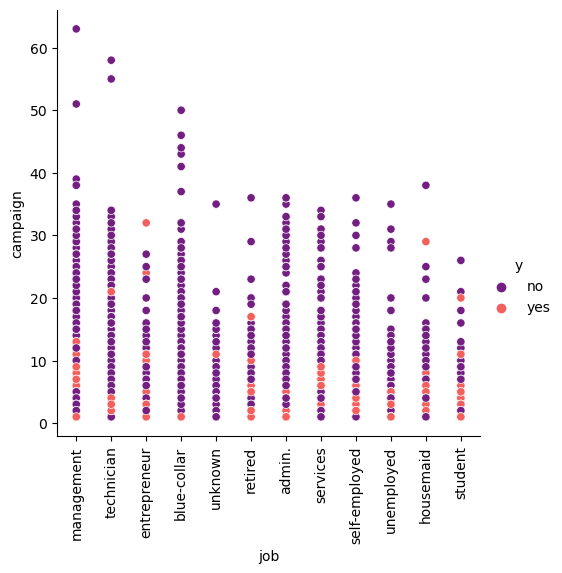

In [21]:
plt.figure(figsize = (20,8))
sns.relplot(x = 'job', y = 'campaign', hue = 'y',data = bank_full,palette = 'magma')
plt.xticks(rotation = 90)
plt.show()

In [120]:
s = (bank_full.dtypes == 'object')
object_cols = list(s[s].index)

print("Object variables in the dataset:", object_cols)

Object variables in the dataset: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']


In [122]:
LE=LabelEncoder()
for i in object_cols:
    bank_full[i]= bank_full[[i]].apply(LE.fit_transform)

In [126]:
x = bank_full.drop(['duration','y','age','duration/min'],axis = 1)
y = bank_full['y']

In [127]:
x

,job,marital,education,default,housing,loan,contact,day,month,campaign,pdays,previous,poutcome
0,4,1,2,0,1,0,2,5,8,1,-1,0,3
1,9,2,1,0,1,0,2,5,8,1,-1,0,3
2,2,1,1,0,1,1,2,5,8,1,-1,0,3
3,1,1,3,0,1,0,2,5,8,1,-1,0,3
4,11,2,3,0,0,0,2,5,8,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,9,1,2,0,0,0,0,17,9,3,-1,0,3
45207,5,0,0,0,0,0,0,17,9,2,-1,0,3
45208,5,1,1,0,0,0,0,17,9,5,184,3,2
45209,1,1,1,0,0,0,1,17,9,4,-1,0,3


In [134]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 30)

In [135]:
LR = LogisticRegression(solver='lbfgs', max_iter=1000)

In [136]:
LR.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [137]:
predict_LR = LR.predict(x_test)

In [139]:
print('Accuracy score: ',accuracy_score(y_test,predict_LR)* 100)

Accuracy score:  88.58743733411973


In [140]:
RF = RandomForestClassifier()

In [141]:
RF.fit(x_train,y_train)

RandomForestClassifier()

In [142]:
predict_RF = RF.predict(x_test)

In [143]:
print('Accuracy score: ',accuracy_score(y_test,predict_RF)* 100)

Accuracy score:  88.38838100855206
